In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\aron7\\Diamond_Price_Predictor\\data\\diamonds.csv")


# Display shape and first few rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# Column data types and non-null counts
df.info()

# Descriptive statistics for numeric columns
df.describe().T

# Count missing values per column
df.isna().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [3]:
# 1. Column types and non-null counts
df.info()

# 2. Descriptive statistics for numeric columns
df.describe().T

# 3. Check for missing values
df.isna().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [4]:
# Drop Unnecessary Columns
df = df.drop(columns=["Unnamed: 0"])


In [5]:
# Encoding the Categorical Variables
import pandas as pd

# Define ordered categories
cut_order    = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color_order  = ["J", "I", "H", "G", "F", "E", "D"]
clarity_order= ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

# Apply pandas Categorical with ordering, then convert to codes
df["cut"]     = df["cut"].astype(pd.CategoricalDtype(cut_order, ordered=True)).cat.codes
df["color"]   = df["color"].astype(pd.CategoricalDtype(color_order, ordered=True)).cat.codes
df["clarity"] = df["clarity"].astype(pd.CategoricalDtype(clarity_order, ordered=True)).cat.codes

# Quick check
df[["cut","color","clarity"]].head()


,cut,color,clarity
0,4,5,1
1,3,5,2
2,1,5,4
3,3,1,3
4,1,0,1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features & target
X = df.drop(columns=["price"])
y = df["price"]

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Instantiate & train
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict & evaluate
y_pred = lr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))


MAE: 805.2743660189811
RMSE: 1224.5965418579533
R²: 0.9056643685073514


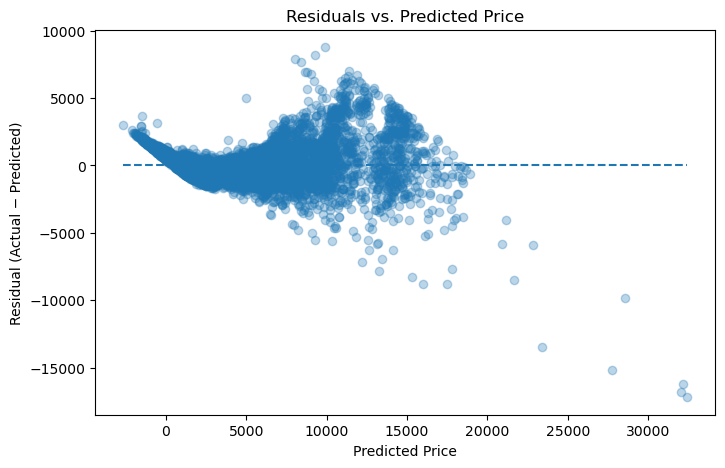

In [7]:
# Residuals vs Predicted Plot
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Scatter: Predicted vs. Residual
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles="dashed")
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual − Predicted)")
plt.title("Residuals vs. Predicted Price")
plt.show()


In [8]:
# Log-Transform the Target; because diamond prices are skewed, we model log(price)
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Log-transform the target
y_train_log = np.log(y_train)
y_test_log  = np.log(y_test)

# Train on log-prices
lr_log = LinearRegression()
lr_log.fit(X_train, y_train_log)

# Predict and invert transform
y_pred_log      = lr_log.predict(X_test)
y_pred_from_log = np.exp(y_pred_log)

# Evaluate on original scale
mae_log  = mean_absolute_error(y_test, y_pred_from_log)
rmse_log = mean_squared_error(y_test, y_pred_from_log, squared=False)
r2_log   = r2_score(y_test_log, y_pred_log)

print(f"MAE (orig scale): {mae_log:.2f}")
print(f"RMSE (orig scale): {rmse_log:.2f}")
print(f"R² (log scale): {r2_log:.4f}")


MAE (orig scale): 536.15
RMSE (orig scale): 1221.03
R² (log scale): 0.9696


In [10]:
# Since the log-model improves things, we will use it
import joblib
joblib.dump(lr_log, "models/diamond_price_lr_log.pkl")


['models/diamond_price_lr_log.pkl']

,cut,color,clarity
0,4,5,1
1,3,5,2
2,1,5,4
3,3,1,3
4,1,0,1


MAE: 805.2743660189811
RMSE: 1224.5965418579533
R²: 0.9056643685073514


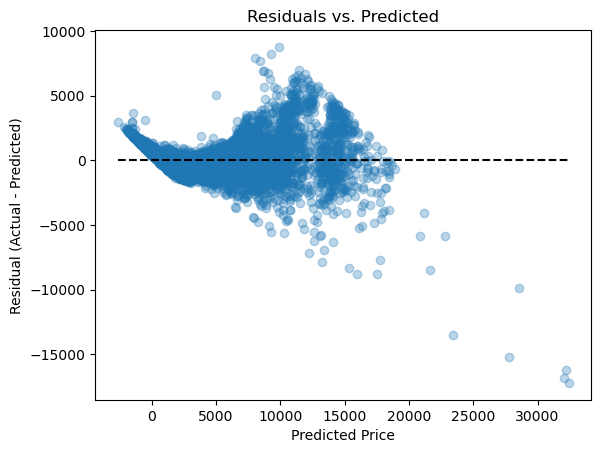

MAE on original scale: 536.1454970013584
RMSE on original scale: 1221.0293269482484
R² on log-scale: 0.9696376306711507
